In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

## K-Means 

In [2]:
df = pd.read_csv("USArrests.csv").copy()
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.index=df.iloc[:,0]

In [5]:
df=df.iloc[:,1:]

In [10]:
df = df.rename_axis(index=None)

In [12]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


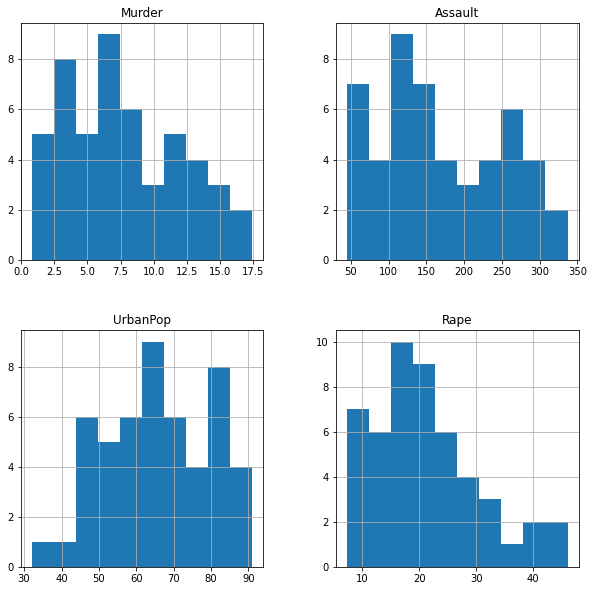

In [16]:
df.hist(figsize=(10,10));

## K-means Model and Visulation

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(n_clusters=4)

In [18]:
?kmeans

Type:        KMeans
String form: KMeans(n_clusters=4)
File:        c:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose `n_clusters` observations (rows) at random from data
    for the initial centroids.

    If an array is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

    If a callable is passed, it should take arguments X, n_clusters and a
    random state and return an initialization

In [19]:
k_fit=kmeans.fit(df)

In [20]:
k_fit.n_clusters

4

In [21]:
k_fit.cluster_centers_

array([[  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ]])

In [22]:
k_fit.labels_

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 3, 0, 1, 0, 3, 0, 0, 1, 3, 1, 2, 1,
       3, 1, 2, 0, 0, 1, 3, 2, 1, 1, 1, 3, 0, 2, 2, 0, 2, 1, 3, 2, 2, 0,
       3, 2, 2, 3, 3, 2])

## Visulation 

In [30]:
kmeans = KMeans(n_clusters = 3)
k_fit=kmeans.fit(df)

In [31]:
clus=k_fit.labels_

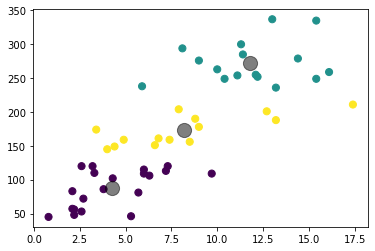

In [34]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c =clus, s = 50, cmap = "viridis")
center= k_fit.cluster_centers_

plt.scatter(center[:,0], center[:,1], c = "black", s = 200, alpha = 0.5);

In [35]:
from mpl_toolkits.mplot3d import Axes3D

In [36]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
clus = k_fit.labels_
center = kmeans.cluster_centers_

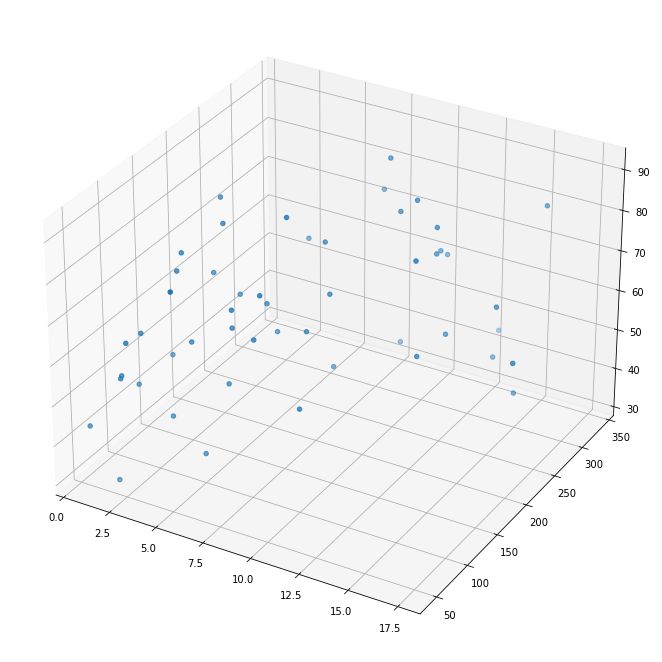

In [37]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]);

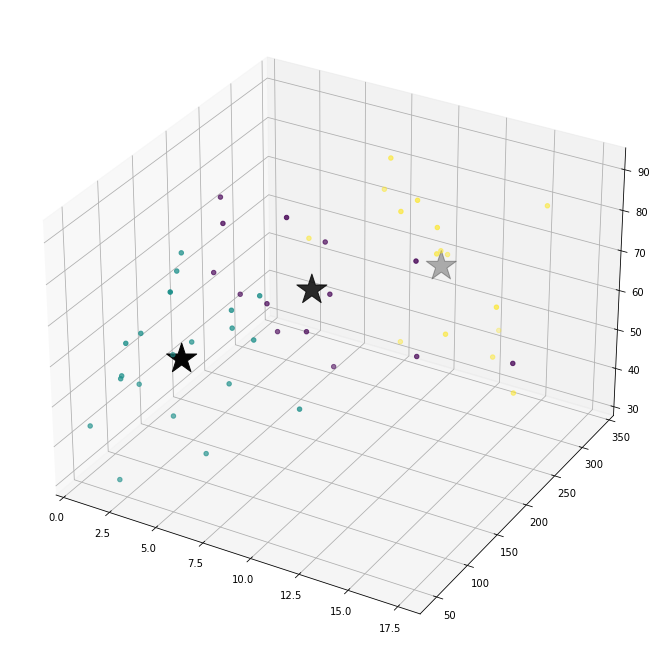

In [39]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=clus)
ax.scatter(center[:, 0], center[:, 1], center[:, 2], 
           marker='*', 
           c='#050505', 
           s=1000);

In [40]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
clus = k_fit.labels_

In [42]:
pd.DataFrame({"States" : df.index, "Clusters": clus})[0:10]

,States,Clusters
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,1
7,Delaware,0
8,Florida,0
9,Georgia,2


In [43]:
df["clus_no"] = clus

In [45]:
df["clus_no"]=df["clus_no"]+1

In [46]:
df.head()

,Murder,Assault,UrbanPop,Rape,clus_no
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,1


## Determining the Optimum Number of Clusters

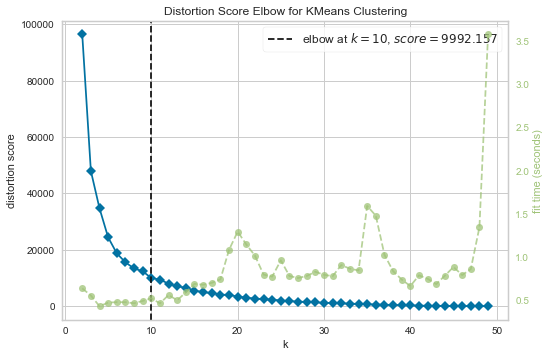

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))
visualizer.fit(df) 
visualizer.poof() 

In [51]:
kmeans = KMeans(n_clusters = 10)
k_fit = kmeans.fit(df)
clus = k_fit.labels_

In [52]:
pd.DataFrame({"States" : df.index, "Clusters": clus})[0:10]

,States,Clusters
0,Alabama,1
1,Alaska,8
2,Arizona,7
3,Arkansas,4
4,California,7
5,Colorado,4
6,Connecticut,3
7,Delaware,1
8,Florida,6
9,Georgia,4


## Hierarchical Clustering

In [53]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

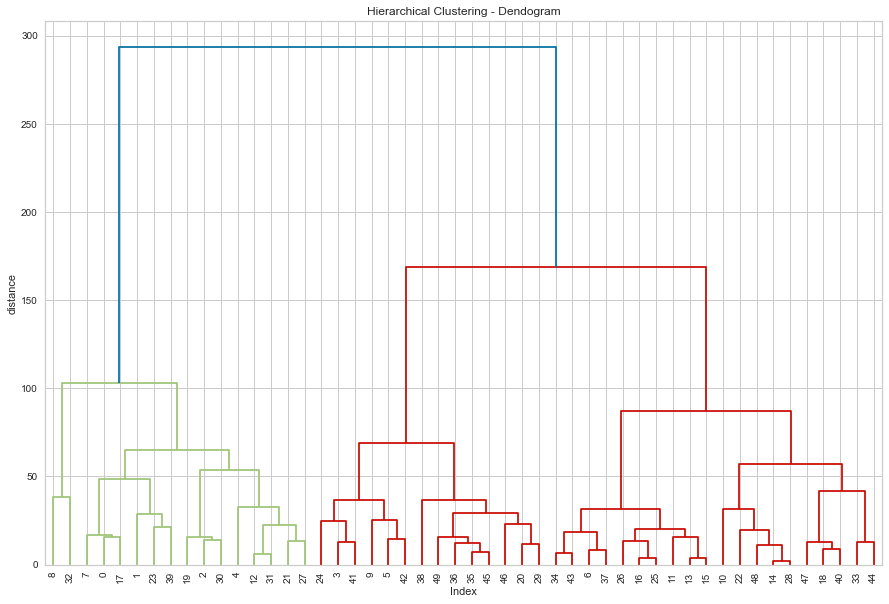

In [57]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Index')
plt.ylabel('distance')
dendrogram(
    hc_complete,
    leaf_font_size=10
);

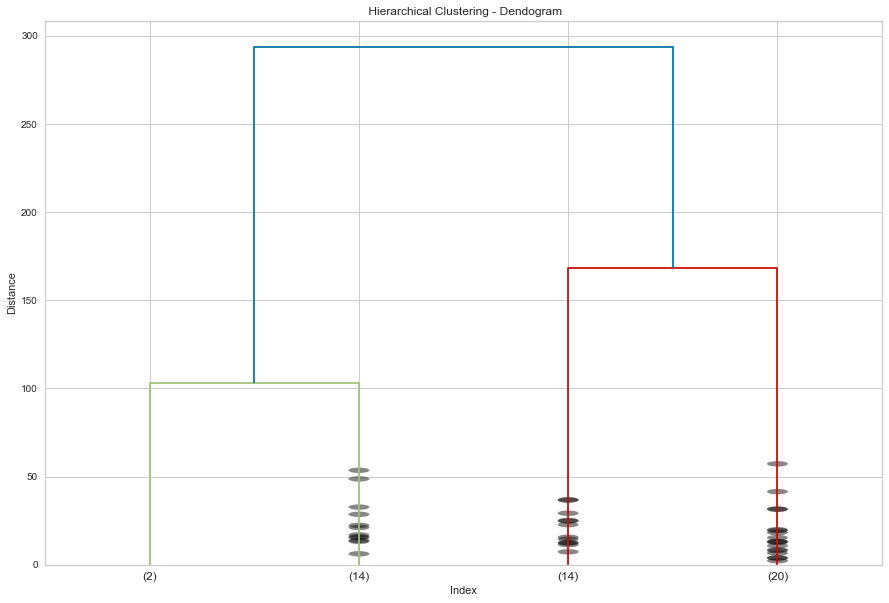

In [58]:

plt.figure(figsize=(15, 10))
plt.title(' Hierarchical Clustering - Dendogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 4,
    show_contracted = True
);

## Optimum Number of Clusters

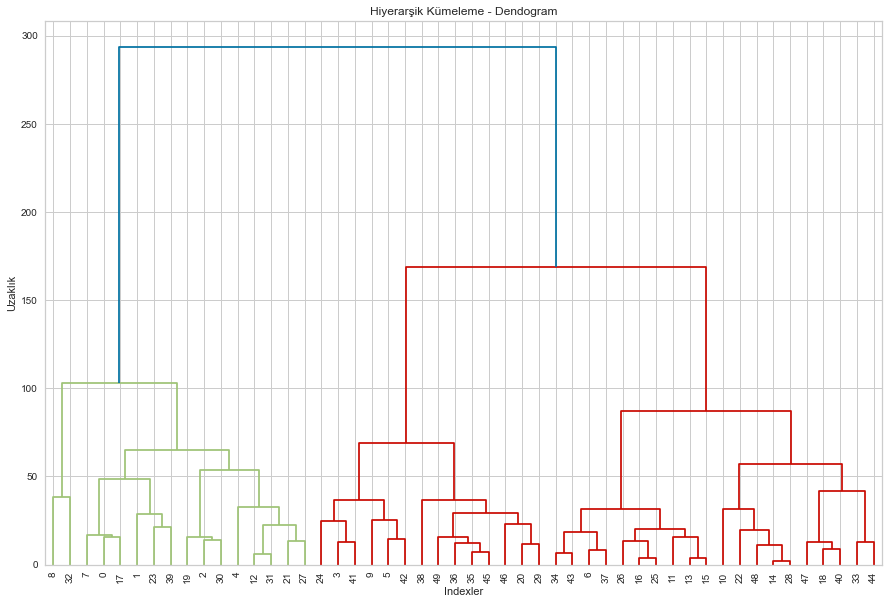

In [60]:

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
den = dendrogram(
    hc_complete,
    leaf_font_size=10
);

In [61]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, 
                                  affinity = "euclidean", 
                                  linkage = "ward")

cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [62]:
pd.DataFrame({"sTATES" : df.index, "cLUSTERS": cluster.fit_predict(df)})[0:10]

,sTATES,cLUSTERS
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,2


In [63]:
df["Cluster_no"] = cluster.fit_predict(df)

In [64]:
df.head()

,Murder,Assault,UrbanPop,Rape,clus_no,Cluster_no
Alabama,13.2,236,58,21.2,1,0
Alaska,10.0,263,48,44.5,1,0
Arizona,8.1,294,80,31.0,1,0
Arkansas,8.8,190,50,19.5,3,2
California,9.0,276,91,40.6,1,0


# PCA

In [65]:
df1 = pd.read_csv("USArrests.csv").copy()
df1.index = df.iloc[:,0]
df1 = df1.iloc[:,1:5]
#del df.index.name
df1.head()

,Murder,Assault,UrbanPop,Rape
Murder,,,,
13.2,13.2,236,58,21.2
10.0,10.0,263,48,44.5
8.1,8.1,294,80,31.0
8.8,8.8,190,50,19.5
9.0,9.0,276,91,40.6


In [66]:
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df)
df[0:5,0:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116, -1.24101046],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -1.24101046],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626, -1.24101046],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398,  1.34442799],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393, -1.24101046]])

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca_fit = pca.fit_transform(df)

In [68]:
pca_df = pd.DataFrame(data = pca_fit, 
                          columns = ["firs_component","second_component","third_component"])

In [69]:
pca_df.head()

,firs_component,second_component,third_component
0,1.890378,1.253694,0.237232
1,2.677119,0.749440,0.479889
2,2.381510,-0.215331,-1.137568
3,-0.756187,-0.041870,1.562077
4,2.905983,-1.146908,-1.419326


In [70]:
pca.explained_variance_ratio_

array([0.52406068, 0.22156891, 0.12412453])

In [71]:
pca = PCA().fit(df)

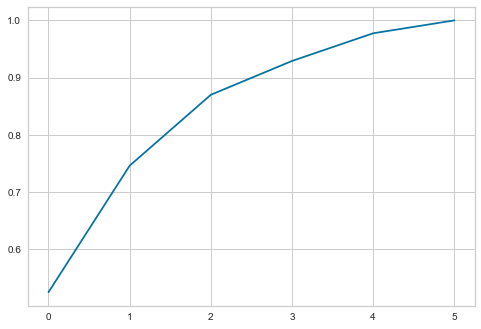

In [73]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));